<a href="https://colab.research.google.com/github/JBSspc/PracticasComputacionII/blob/main/MatrizInversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import sys

# llenar la matriz
print('\n----- Entrada de valores -----\n')
v = int(input('Número de ecuaciones: '))
c = 2 * v
z = np.zeros((v,v))

print ('\nCoeficientes de la matriz aumentada: ')
for i in range(v):
  for j in range(v):
    z[i][j] = float(input('Valor del elemento [' + str(i) + '][' + str(j) + ']: '))
A = z
print(A)

print('\n----- Entrada de valores -----\n')
# concatener A e I
I = np.identity(v)
zI = np.concatenate([z, I], axis = 1) # axis = 1 -> concatenar columnas
print('\nMatriz A e I concatenadas: \n', zI)


f = len(zI)
s = 2 * len(zI) 
print('\nfilas de zI: ', f, '\ncolumnas de zI: ', s, '\n')

# Gauss (ceros debajo de la diagonal principal)
for i in range(f):
  if zI[i][j] == 0.0:
    sys.exit('Alto! Disión entre 0!')
  for j in range (f):
    if i != j:
      r = zI[j][i] / zI[i][i]
      for k in range(s):
        zI[j][k] = zI[j][k] - r * zI[i][k]

print('Aplicando eliminación Gaussiana (hacia abajo):\n', zI)

# Gauss Jordan (ceros arriba de la diagonal principal)
for i in range(f):
  p = zI[f-1-i][f-1-i]
  zI[f-1-i] = zI[f-1-i]/p
  for j in range(f-1-i):
    zI[j] = zI[j] - zI[j][f-1-i] * zI[f-1-i] 

print('\nAplicando GJ (hacia arriba):\n', zI)

# AA^-1 = I

I,AI = np.hsplit(zI,2)
AdotAI = np.dot(A,AI)

print('Matriz A:\n', A)
print('\nMatriz invertida A^-1:\n', AI)
print('\nProducto AA^-1:\n', AdotAI)




----- Entrada de valores -----

Número de ecuaciones: 2

Coeficientes de la matriz aumentada: 
Valor del elemento [0][0]: 2
Valor del elemento [0][1]: 3
Valor del elemento [1][0]: 2
Valor del elemento [1][1]: 2
[[2. 3.]
 [2. 2.]]

----- Entrada de valores -----


Matriz A e I concatenadas: 
 [[2. 3. 1. 0.]
 [2. 2. 0. 1.]]

filas de zI:  2 
columnas de zI:  4 

Aplicando eliminación Gaussiana (hacia abajo):
 [[ 2.  0. -2.  3.]
 [ 0. -1. -1.  1.]]

Aplicando GJ (hacia arriba):
 [[ 1.   0.  -1.   1.5]
 [-0.   1.   1.  -1. ]]
Matriz A:
 [[2. 3.]
 [2. 2.]]

Matriz invertida A^-1:
 [[-1.   1.5]
 [ 1.  -1. ]]

Producto AA^-1:
 [[1. 0.]
 [0. 1.]]


Resolvamos el siguiente caso de la vida real:
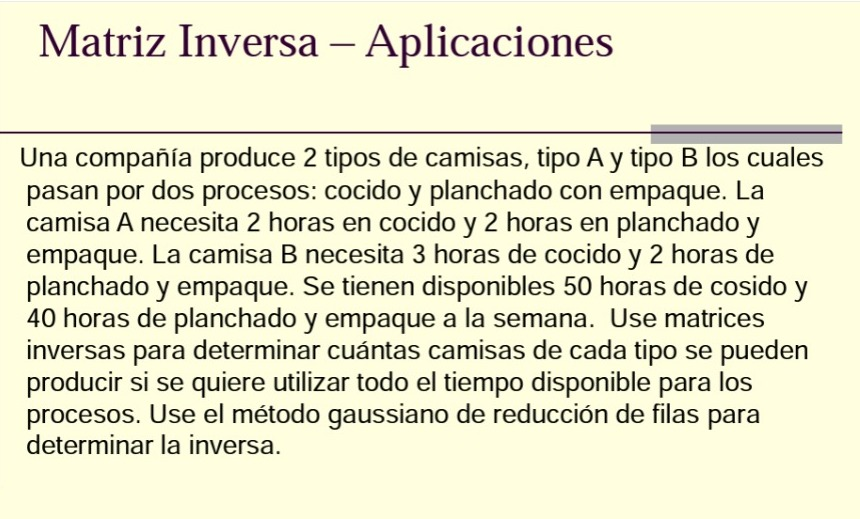

In [36]:
b = [[50],[40]]
print(b)

x = np.dot(AI,b)
print(x)

[[50], [40]]
[[10.]
 [10.]]


Por lo tanto, deben producirse 10 camisas tipo A y 10 camisas tipo B para aprovechar al máximo el tiempo del que se dispone.
Podemos corroborar este resultado con el siguiente código:

In [37]:
# Importamos la librería NumPy
import numpy as np
# Importamos sys para salir del programa cuando se divida entre 0
import sys

# Pedimos al usuario que ingrese el número de variables
v = int(input('Número de ecuaciones: '))

# Hacemos un arreglo (matriz) de v x v + 1
# v + 1 --> # columnas = # variables + 1 (columna de solución)
# La inicializamos en 0 con np.zeros
z = np.zeros((v,v + 1))

# Hacemos un arrglo para la solución
# Tamaño: n x 1 (para que sea vector columna) #no salió :(
# Lo inicializamos en 0
x = np.zeros((v , 1))

# Pedimos al usuario los coef. de la matriz aumentada
print('\nCoeficientes de la matriz aumentada: ')
for i in range(v):
  for j in range(v + 1):
    z [i][j] = float(input('Valor elemento [' + str(i) +'][' + str(j) + ']: '))

# Método de Gauss Jordan
for i in range(v):
  if z[i][j] == 0.0:
    sys.exit('Alto! Divides entre 0!')
  for j in range(v):
    if i != j:
      r = z[j][i] / z[i][i]
      for k in range(v + 1):
        z[j][k] = z[j][k] - r * z[i][k]
  print("\n", z, "\n")

# Para la solución9
for i in range (v):
  x[i] = z[i][v] / z[i][i]

# Mostrar la solución en consola
print('\nSolución: ')
for i in range(v):
  print('X%d = %0.2f' %(i, x[i]), end = '\t')

# %0.2f -> imprimir float con 2 espacios después del punto -> 0.00

Número de ecuaciones: 2

Coeficientes de la matriz aumentada: 
Valor elemento [0][0]: 2
Valor elemento [0][1]: 3
Valor elemento [0][2]: 50
Valor elemento [1][0]: 2
Valor elemento [1][1]: 2
Valor elemento [1][2]: 40

 [[  2.   3.  50.]
 [  0.  -1. -10.]] 


 [[  2.   0.  20.]
 [  0.  -1. -10.]] 


Solución: 
X0 = 10.00	X1 = 10.00	

Por lo tanto, el código funciona correctamente.

### Referencias

* Petróleo y programación SMAE. Separar arreglos con NumPy: <https://www.youtube.com/watch?v=6FJ0IWL1srA>

* OKPEDIA. (2021). Cómo multiplicar matrices en python: <http://how.okpedia.org/es/python/como-multiplicar-matrices-en-python>

* NumPy. (2022). numpy.concatenate: <https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html>